In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
dataDict = {
'State' : pd.Series(['FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM','FM','AFM'],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Total Energy' : pd.Series([0,-409.6613112,0,-409.6662505,0,-409.6606203,0,-409.6572719,0,-409.6532409,0,-409.644488,0,-409.6443056], index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Energy Error' : pd.Series([0,0.0003148954066,0,0.0002882958004,0,0.0002979773228,0,0.0002929261945,0,0.0002909150662,0,0.0003020348232,0,0.000283004986],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 00': pd.Series([0,-0.120118,0,-0.117791,0,-0.125628,0,-0.130531,0,-0.138879,0,-0.150057,0,-0.121892],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 00 Error': pd.Series([0,0.0130504,0,0.0131578,0,0.0133120,0,0.0135397,0,0.0134110,0,0.0133247,0,0.0124380],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 11':pd.Series([0,-0.311186,0,-0.314589,0,-0.320463,0,-0.327050,0,-0.333893,0,-0.341238,0,-0.216543],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 11 Error': pd.Series([0,0.0123319,0,0.0123871,0,0.01254410,0,0.0127279,0,0.0125837,0,0.0125130,0,0.0118200],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 01':pd.Series([0,0.0463585,0,0.0465455,0,0.0498790,0,0.054142,0,0.057949,0,0.0629525,0,0.0279825],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90']),
'Mn-O 01 Error': pd.Series([0,0.0141817,0,0.0138918,0,0.0147941,0,0.014350,0,0.0142157,0,0.0145353,0,0.0133290],index=['0','0', '15','15', '30','30','45','45','60','60','75','75','90', '90'])
}

In [3]:
keyData = pd.DataFrame(dataDict)
keyData

,Energy Error,Mn-O 00,Mn-O 00 Error,Mn-O 01,Mn-O 01 Error,Mn-O 11,Mn-O 11 Error,State,Total Energy
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FM,0.000000
0,0.000315,-0.120118,0.013050,0.046358,0.014182,-0.311186,0.012332,AFM,-409.661311
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FM,0.000000
15,0.000288,-0.117791,0.013158,0.046545,0.013892,-0.314589,0.012387,AFM,-409.666250
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FM,0.000000
30,0.000298,-0.125628,0.013312,0.049879,0.014794,-0.320463,0.012544,AFM,-409.660620
45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FM,0.000000
45,0.000293,-0.130531,0.013540,0.054142,0.014350,-0.327050,0.012728,AFM,-409.657272
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FM,0.000000
60,0.000291,-0.138879,0.013411,0.057949,0.014216,-0.333893,0.012584,AFM,-409.653241


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


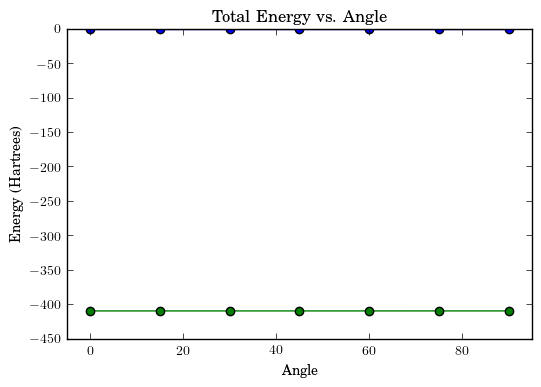

In [7]:
#energy

angle =[0,15,30,45,60,75,90]
afm = []
fm = []
errfm=[]
errafm=[]
for index, row in keyData.iterrows():
    if row[7] == 'FM':
        fm.append(row[8])
        errfm.append(row[0])
    else:
        afm.append(row[8])
        errafm.append(row[0])
plt.errorbar(angle,fm,errfm,marker='o',mew=1)
plt.errorbar(angle,afm,errafm,marker='o',mew=1)
plt.legend(loc='upper left')
plt.xlim(-5, 95)
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Angle')
plt.title('Total Energy vs. Angle')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


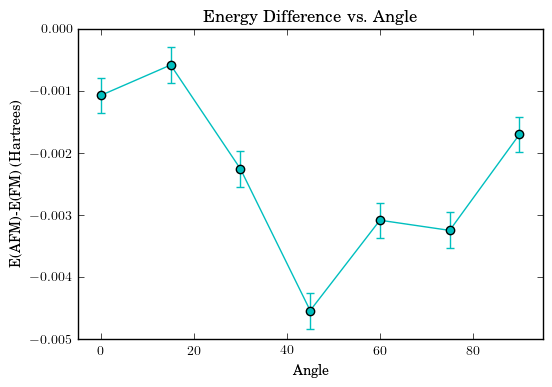

array([-0.0010746, -0.0005853, -0.0022609, -0.0045461, -0.0030887,
       -0.003253 , -0.0017049])

In [5]:
#create and plot energy diff

diff= np.array(afm)-np.array(fm)
errdiff = (np.array(errafm)**2+np.array(errfm)**2)**(1/2)
plt.errorbar(angle,diff,errdiff,marker='o',color='c',mew=1)
plt.legend(loc='upper left')
plt.xlim(-5, 95)
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('Angle')
plt.title('Energy Difference vs. Angle')

plt.show()
diff

In [6]:
#Fit function
def func(x, a, b, c):
    return a*np.exp(-b*(x))+c

In [7]:
#beginning of a couple examples

MnO00afm = []
MnO00fm = []
errfm = []
errafm = []
for index, row in keyData.iterrows():
    if row[7] == 'FM':
        MnO00fm.append(row[1])
        errfm.append(row[2])
    else:
        MnO00afm.append(row[1])
        errafm.append(row[2])
MnO00afm = np.asarray(MnO00afm)
MnO00fm = np.asarray(MnO00fm)
errfm = np.asarray(errfm)
errafm = np.asarray(errafm)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


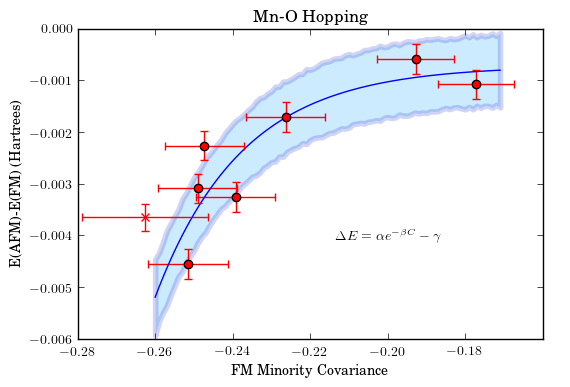

array([ -4.28728439e-08,   4.44488980e+01,  -7.16761261e-04])

In [8]:
inds = MnO00fm.argsort()
sortedErr =errfm[inds]
sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

popt, pcov = curve_fit(func, sortedMnO00fm, sortedDiff, [-.00000043,4.4,-.00071676])
x=np.arange(-0.26, -0.17, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
#y += np.random.normal(0, 0.0001, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, antialiased=True)
plt.plot(x, y)
#plt.text(-.20, -0.005,r'$y = -4.28\times 10^{-8}e^{-44x}-7.17\times 10^{-4}$', horizontalalignment='center',
#     verticalalignment='center')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center')
plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1,linestyle='None')
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('FM Minority Covariance')
plt.title('Mn-O Hopping')
#Solid
#Solid MnO
#FM -- "value":[-964.3589612], "error":[0.004312391323]
#AFM -- "value":[-964.4466485], "error":[0.00437411124],
#energy per AFM bond
soldiff = [-0.0036536375]
solerr = [0.00026]
solfmcovar = [-0.262576176373]
solfmerr = [0.0162362221221873]
plt.errorbar(solfmcovar,soldiff,xerr=solfmerr,yerr=solerr,marker='x',color='r',mew=1,linestyle='None')
plt.show()
popt

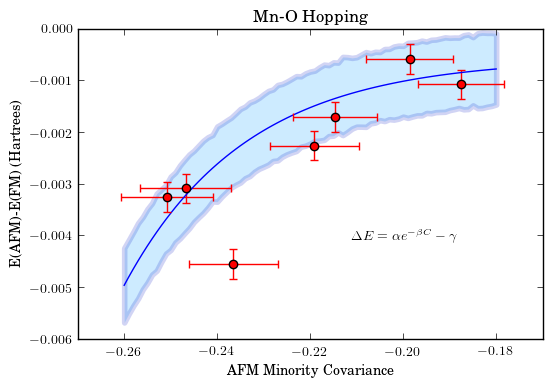

[ -2.15123211e-07   3.81713078e+01  -5.72176322e-04]


In [9]:
inds = MnO00afm.argsort()
sortedErr =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

popt, pcov = curve_fit(func, sortedMnO00fm, sortedDiff, [-2.15001007e-07,3.81735185e+01,-5.72230001e-04])
x=np.arange(-0.26, -0.18, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
#y += np.random.normal(0, 0.0001, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, antialiased=True)
plt.plot(x, y)
#plt.text(-.20, -0.005,r'$y = -2.15\times 10^{-7}e^{-38x}-5.72\times 10^{-4}$', horizontalalignment='center',
#     verticalalignment='center')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center')
plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErr,yerr=sortedDiffErr,marker='o',color='r',mew=1,linestyle='None')
plt.ylabel('E(AFM)-E(FM) (Hartrees)')
plt.xlabel('AFM Minority Covariance')
plt.title('Mn-O Hopping')
#Solid
solafmcovar = [-0.24632477282]
solafmerr = [0.01624465174517049]
#plt.errorbar(solafmcovar,soldiff,xerr=solafmerr,yerr=solerr,marker='x',color='r',mew=1,linestyle='None')
plt.show()
print(popt)

[ -2.94056301e-04   1.15169890e+01   1.68157587e-03]


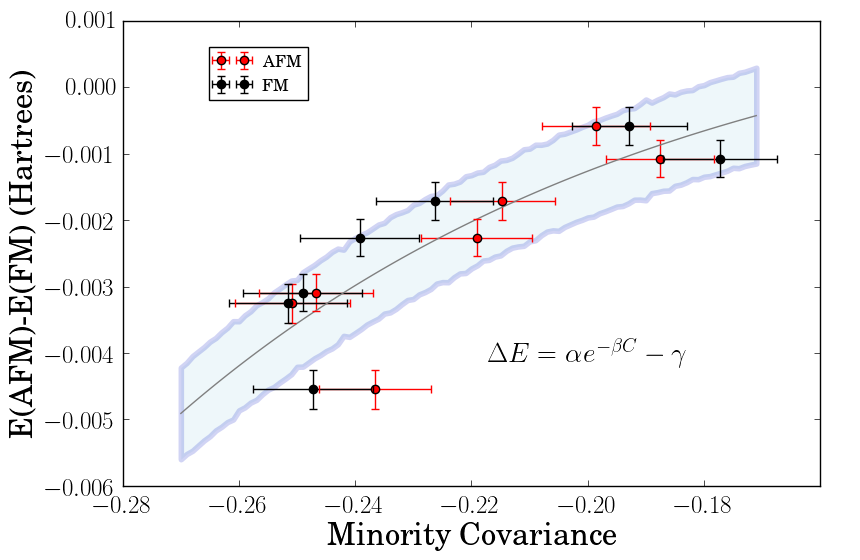

In [15]:
fig = plt.figure(figsize=(9, 6))

inds = MnO00fm.argsort()
sortedErrfm =errfm[inds]
sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

inds = MnO00afm.argsort()
sortedErrafm =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

sortedMnOTot = np.concatenate((sortedMnO00fm,sortedMnO00afm))
sortedDiff2 = np.concatenate((sortedDiff,sortedDiff))

popt, pcov = curve_fit(func, sortedMnOTot, sortedDiff2, [-2.94001007e-04,1.11735185e+01,-1.62230001e-03])
x=np.arange(-0.27, -0.17, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='lightblue',
    linewidth=4, antialiased=True)
plt.plot(x, y,color= 'grey')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center',size=20)
print(popt)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErrafm,yerr=sortedDiffErr,marker='o',color='red',mew=1,linestyle='None',label = 'AFM')
plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErrfm,yerr=sortedDiffErr,marker='o',color='black',mew=1,linestyle='None',label ='FM')
plt.ylabel('E(AFM)-E(FM) (Hartrees)',fontsize=22)
plt.xlabel('Minority Covariance',fontsize=22)
plt.legend(bbox_to_anchor=(0.34, 0.87),
           bbox_transform=plt.gcf().transFigure)
plt.savefig("covar.pdf",bbox_inches="tight")
plt.show()

[ -2.94056301e-04   1.15169890e+01   1.68157587e-03]


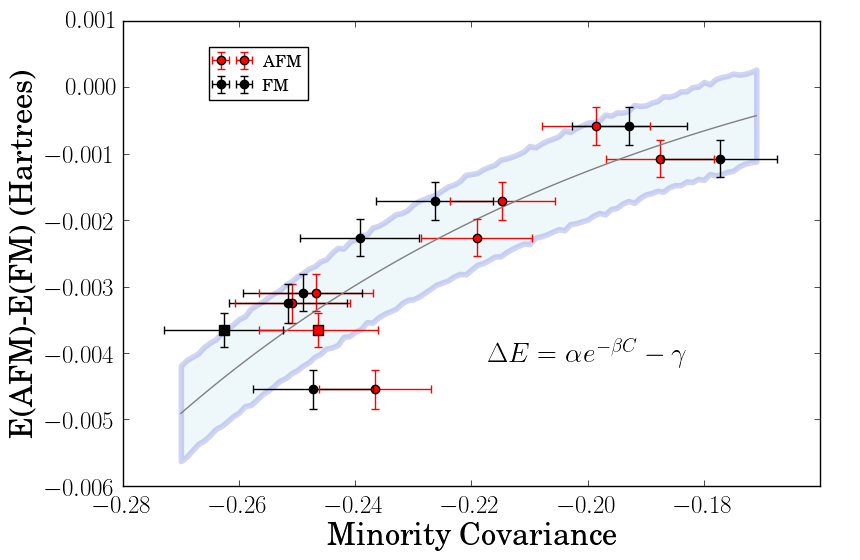

In [16]:
fig = plt.figure(figsize=(9, 6))

sortedMnO00fm = np.sort(MnO00fm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

inds = MnO00afm.argsort()
sortedErrafm =errafm[inds]
sortedMnO00afm = np.sort(MnO00afm)
sortedDiff = diff[inds]
sortedDiffErr = errdiff[inds]

sortedMnOTot = np.concatenate((sortedMnO00fm,sortedMnO00afm))
sortedDiff2 = np.concatenate((sortedDiff,sortedDiff))

popt, pcov = curve_fit(func, sortedMnOTot, sortedDiff2, [-2.94001007e-04,1.11735185e+01,-1.62230001e-03])
x=np.arange(-0.27, -0.17, .001)
y= popt[0]*exp(-popt[1]*x)+popt[2]
error = np.random.normal(0.0007, 0.00002, size=y.shape)
plt.fill_between(x, y-error, y+error,    alpha=0.2, edgecolor='#1B2ACC', facecolor='lightblue',
    linewidth=4, antialiased=True)
plt.plot(x, y,color= 'grey')
plt.text(-.20, -0.004,r'$\Delta E = \alpha e^{- \beta C}-\gamma$', horizontalalignment='center',
     verticalalignment='center',size=20)
print(popt)

plt.errorbar(sortedMnO00afm,sortedDiff,xerr=sortedErrafm,yerr=sortedDiffErr,marker='o',color='red',mew=1,linestyle='None',label = 'AFM')
plt.errorbar(sortedMnO00fm,sortedDiff,xerr=sortedErrfm,yerr=sortedDiffErr,marker='o',color='black',mew=1,linestyle='None',label ='FM')
plt.ylabel('E(AFM)-E(FM) (Hartrees)',fontsize=22)
plt.xlabel('Minority Covariance',fontsize=22)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.tick_params(axis='x', which='major', labelsize=18)
soldiff = [-0.0036536375]
solerr = [0.00026]
solfmcovar = [-0.262576176373]
solfmerr = [0.0102362221221873]
plt.errorbar(solfmcovar,soldiff,xerr=solfmerr,yerr=solerr,marker='s',markersize=7,color='black',mew=1,linestyle='None')

solafmcovar = [-0.24632477282]
solafmerr = [0.01024465174517049]
plt.errorbar(solafmcovar,soldiff,xerr=solafmerr,yerr=solerr,marker='s',markersize=7,color='red',mew=1,linestyle='None')
plt.legend(bbox_to_anchor=(0.34, 0.87),
           bbox_transform=plt.gcf().transFigure)
plt.savefig("covarsolid.pdf",bbox_inches="tight")
plt.show()